<h1><center> K - Nearest Neighbors </center><h1>

In [ ]:
%config Completer.use_jedi = False

In [1]:
import pandas as pd 
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

### reshape, matrices y vectores

In [2]:
# vector 
v = np.array([1,2,3])
v.shape

(3,)

In [3]:
# Vector columna

v = v.reshape(3,1)

In [4]:
v.reshape(-1,1).shape

(3, 1)

In [5]:
# Vector fila
v.reshape(1,3).shape

(1, 3)

In [6]:
# Matriz
m = np.array([[1,2,3],[4,5,6]])
print(m.shape)
m

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
m.reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

***
___

## <p><span style="color: #ff0000;">Ejercicio</span></p>

Importe la base de datos disponible en

> https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

In [8]:
data = pd.read_csv('C:/Users/57350/Downloads/heart.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


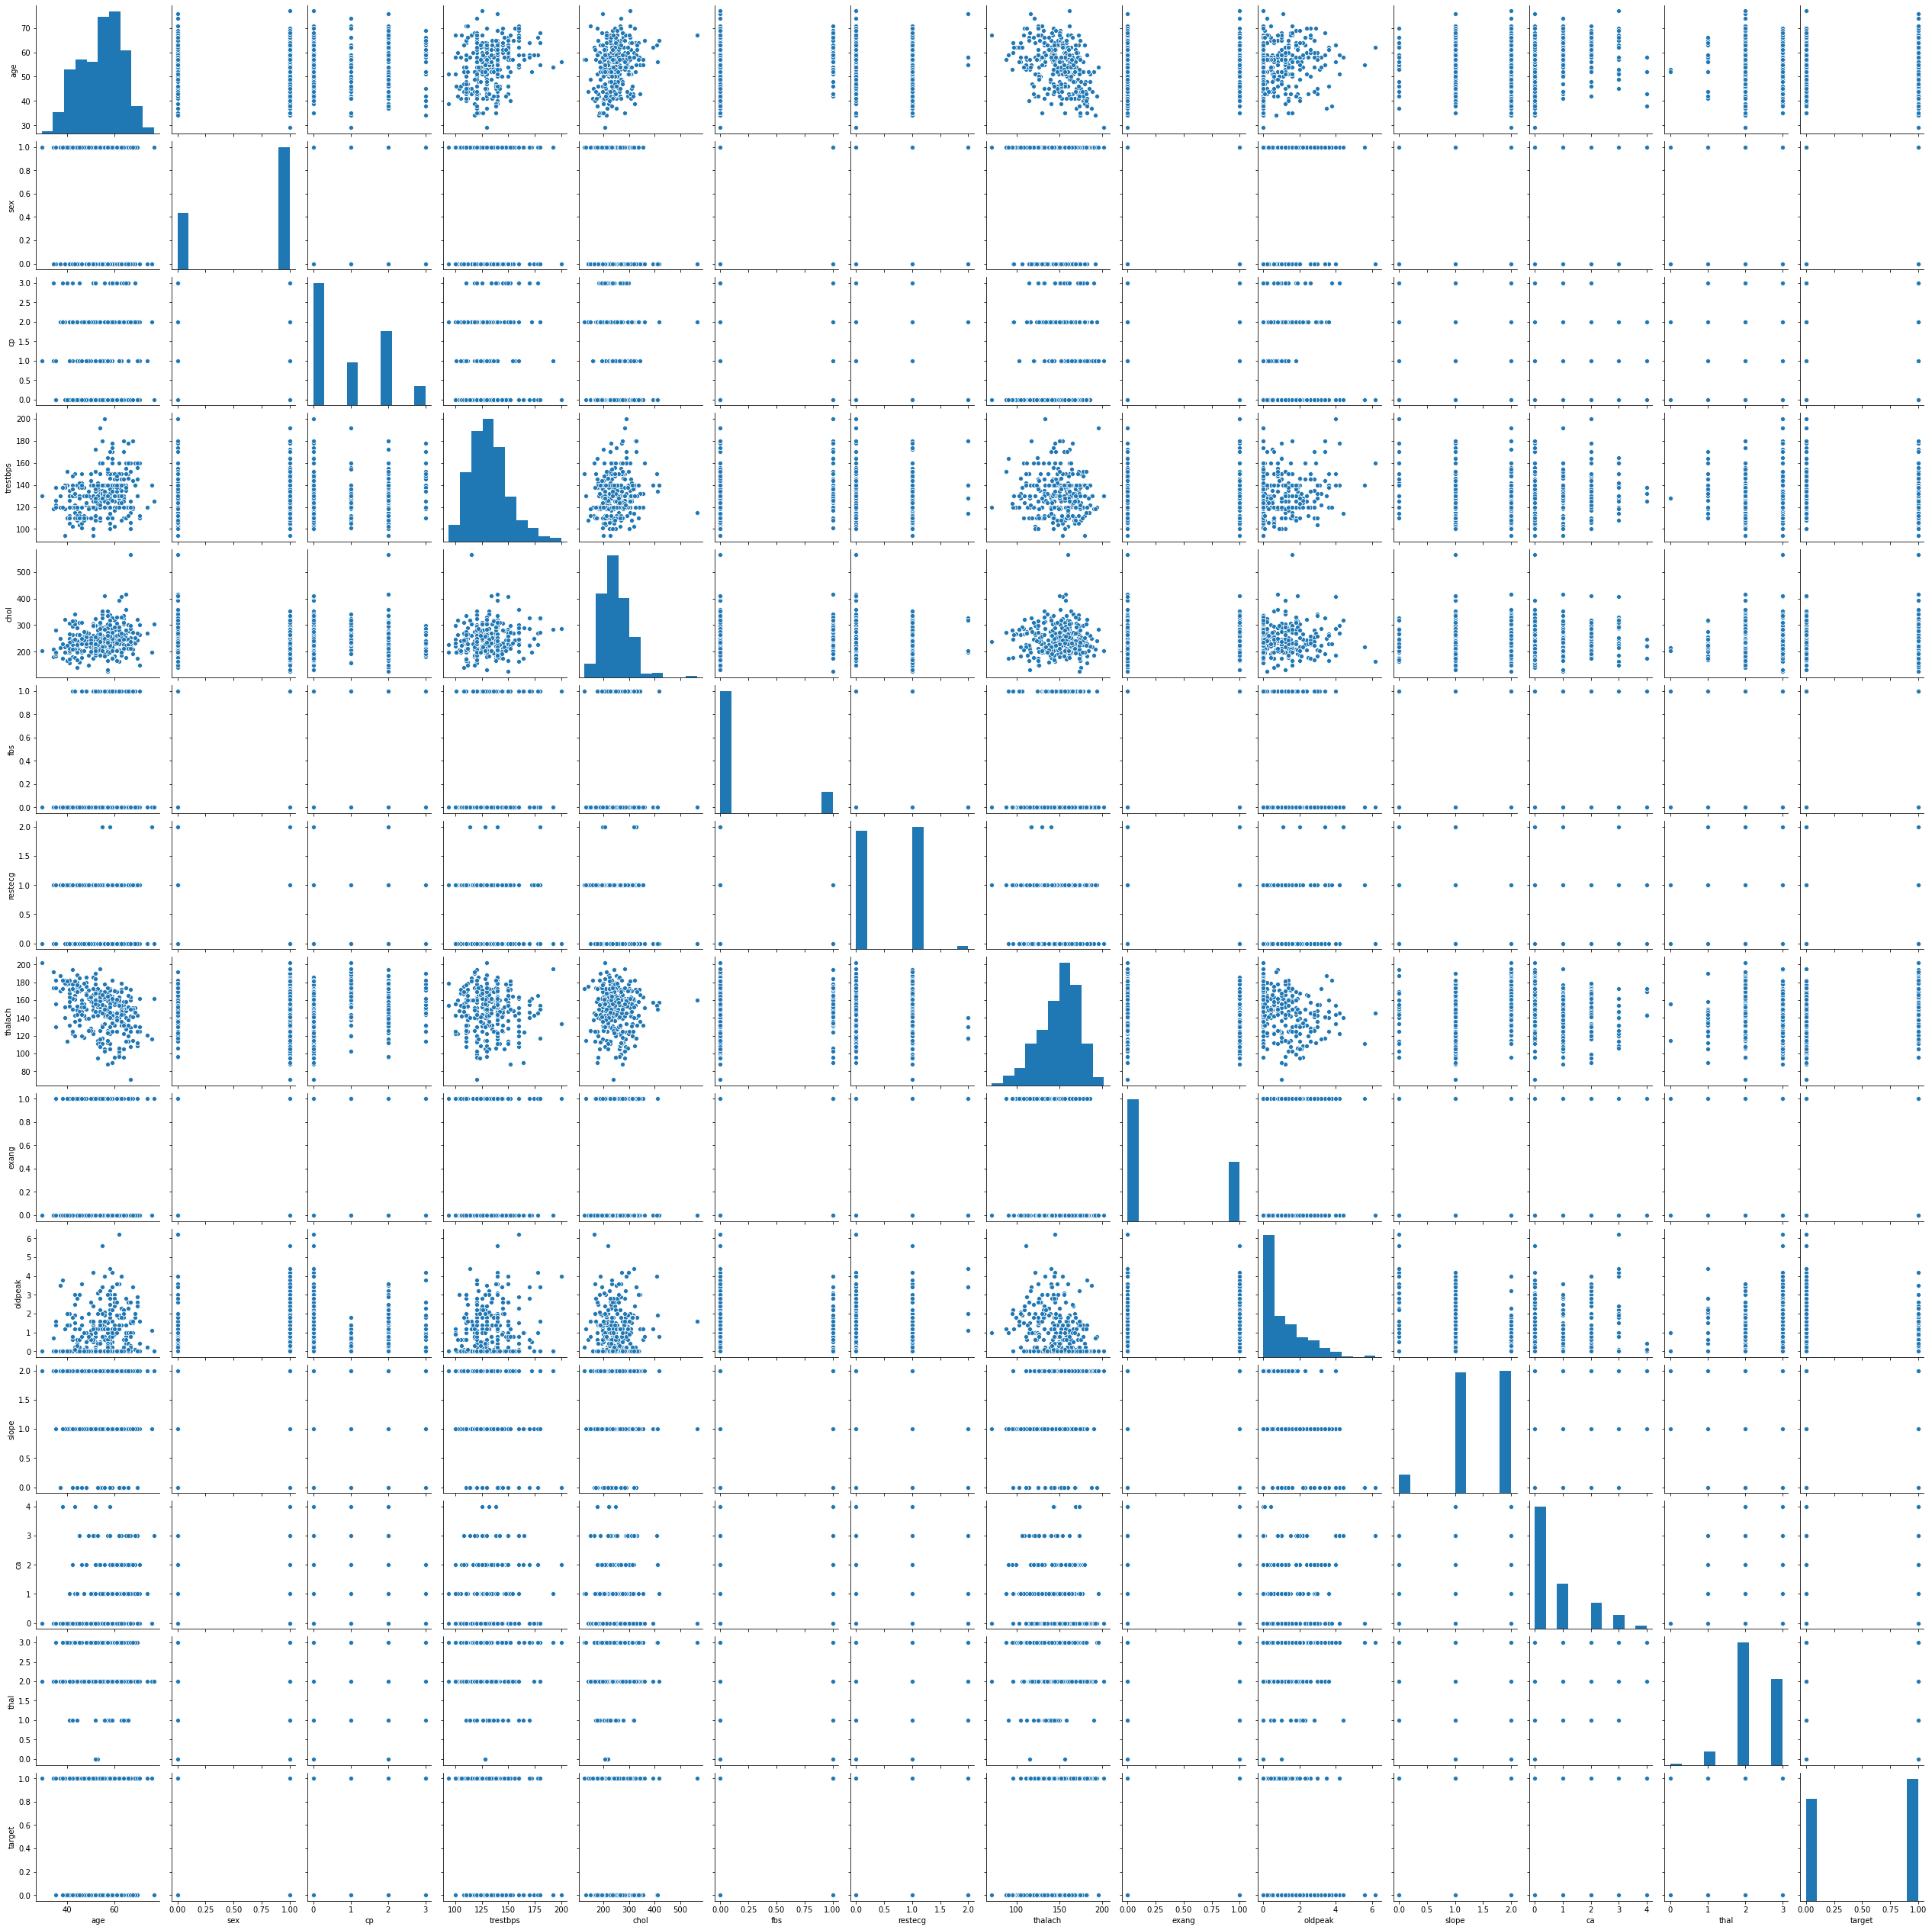

In [11]:
sns.pairplot(data)

***
___

<h1><center> Variable Objetivo y Variables Predictoras </center></h1>

## <p><span style="color: #ff0000;">Ejercicio</span></p>

La variable objetivo $y$ es la variable a predecir, en este caso ``target``. escoja la variable objetivo de la base de datos


In [ ]:
## Respuesta
y = 

## <p><span style="color: #ff0000;">Ejercicio</span></p>

Las variables predictoras $X$ son las características de cada observación de la variable objetivo. En este caso tome la columna ``trestbps`` y ``thalach`` como variables predictoras

In [ ]:
## Respuesta 
X = 

***
___

<h1><center> Conjunto de Entrenamiento y conjunto de Prueba </center></h1>

El ``machine learning``, "aprendizaje automático" o "aprindizaje de máquina" consiste en programar algortimos capaces de identificar patrones, con el finde "aprender" o memorizar comportamientos específicos de los datos que generen resultados esperados. 

Para tal motivo es importante particionar o dividir nuestras variables objetivo y predictoras en dos conjuntos, a saber:

   **Conjunto de Entrenamiento**

Con este subconjunto de los datos entrenamos el modelo que vamos a programar, es decir, el modelo va a memorizar una serie de "reglas" bien definidas que caracterizan al comportamiento de los datos, con cada regla memorizada se asgina una etiqueta o valor objetivo.

   **Conjunto de prueba**

Con este subconjunto de datos se prueban las reglas memorizadas por el algoritmo y se `predice` el resultado de os valores objetivos, el algortimo puede cometer errores de predicción y memorizar reglas del conjunto de entrenamiento que no predicen adecuadamente el resultado en el conjunto de prueba


Por lo general, se detina del 70% al 80% de los datos al conjunto de entrenamiento y el restante al conjunto de prueba.

In [ ]:
%matplotlib notebook
fig  = plt.figure()

plt.axvspan(0,70,facecolor = 'lime', alpha=0.5)
plt.axvspan(70,100,facecolor= 'salmon', alpha = 0.5)

plt.xlim(0,100)
plt.ylim(0,100)

plt.annotate('Conjunto de Entrenamiento',xy=(15,50))
plt.annotate('Conjunto\nde prueba', xy =(80,50))

plt.show()

## <p><span style="color: #ff0000;">Ejercicio</span></p>

Divida la variable objetivo y la variable predictora, en dos conjuntos uno de entrenamiento que contiene el 70% de los datos y otro de prueba que contiene el 30% de los datos de cada variable

In [ ]:
## Respuesta
y_train = 
y_test =

X_train =
X_test =

***
__

# train_test_split

In [ ]:
y = np.array(data['target'])
X = np.array(data[['trestbps','thalach']])

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.70, random_state=14)

<h1><center> K vecinos más cercanos </center></h1>

# K nearst neighbor

o KNN es un algortimo que memoriza la distancia entre los k vecinos más cercanos al valor objetivo, es un algortimo cuyo fundamento es la distancia euclidia. 

Memoriza la distancia entre cada valor objetivo dada por cada una de sus caracterísitcas o valores predictoras y traza una frontera de decisión con distancia equivalente para cada punto

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [ ]:
cmap_bold = ['darkorange', 'c']

fig = plt.figure()

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.title('Conjunto de Entrenamiento')
plt.show()

In [ ]:
fig = plt.figure()

cmap_bold = ['darkblue','darkblue']

sns.scatterplot(x=X_test[:,0],y = X_test[:,1], hue=y_test,
               palette = cmap_bold, alpha=1.0, edgecolor='black')
plt.title('¿Como clasificamos estos nuevos datos?')
plt.show()

***
___

# Entrenamiento del Modelo y predicción

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform').fit(X_train,y_train)
knn_predict = knn.predict(X_test)

### Conjunto de prueba, predicción, y resultado

In [ ]:
resultado = knn_predict != y_test
res = []
for i in resultado:
    if i == True:
        r = 'Inorrecto'
    else:
        r = 'Correcto'
    res.append(r)
res = np.array(res)

cmap_bold = ['darkorange', 'c']
cmap_result = ['white','red']



fig = plt.figure(figsize=(9,15))

plt.subplot(311)
sns.scatterplot(x=X_test[:,0],y=X_test[:,1], hue=y_test[:],
               palette = cmap_bold, alpha = 1.0, edgecolor = 'black')
plt.title('Conjunto de Prueba')

plt.subplot(312)
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=knn_predict[:],
            palette = cmap_bold, alpha = 1.0, edgecolor = 'black')
plt.title('Predicciones')

plt.subplot(3,1,3)
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=res[:],
               palette = cmap_result, alpha = 1.0, edgecolor = 'black')
plt.title('Resultado')

plt.show()


***
___

# Veamos la solución del algoritmo

In [ ]:
X_train,X_test = X_train[:50],X_test[:50]
y_train,y_test = y_train[:50],y_test[:50]

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', ).fit(X_train,y_train)


#ejes
x_min,x_max = X_train[:,0].min() -1, X_train[:,0].max() +1
y_min,y_max = X_train[:,1].min() -1, X_train[:,1].max() +1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.2),
                   np.arange(y_min,y_max,0.2))
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])

#
Z = Z.reshape(xx.shape)

# Plot
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'darkblue']


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points


sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train[:],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-NN con 1 vecino más cercano")
plt.show()

***
___

# La importancia de especificar el número de vecinos más cercanos 

In [ ]:
%matplotlib inline

X_train,X_test = X_train[:50],X_test[:50]
y_train,y_test = y_train[:50],y_test[:50]

knn_k2 = KNeighborsClassifier(n_neighbors=2, weights='uniform').fit(X_train,y_train)
knn_k3 = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(X_train,y_train)
knn_k4 = KNeighborsClassifier(n_neighbors=4, weights='uniform').fit(X_train,y_train)
knn_k5 = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X_train,y_train)

#ejes
x_min,x_max = X_train[:,0].min() -1, X_train[:,0].max() +1
y_min,y_max = X_train[:,1].min() -1, X_train[:,1].max() +1

#coordenadas
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.2),
                   np.arange(y_min,y_max,0.2))
Z2 = knn_k2.predict(np.c_[xx.ravel(),yy.ravel()])
Z3 = knn_k3.predict(np.c_[xx.ravel(),yy.ravel()])
Z4 = knn_k4.predict(np.c_[xx.ravel(),yy.ravel()])
Z5 = knn_k5.predict(np.c_[xx.ravel(),yy.ravel()])

#
Z2 = Z2.reshape(xx.shape)
Z3 = Z3.reshape(xx.shape)
Z4 = Z4.reshape(xx.shape)
Z5 = Z5.reshape(xx.shape)

# Plot
plt.figure(figsize=(20,15))

# K = 2
plt.subplot(2,2,1)
plt.contourf(xx, yy, Z2, cmap=cmap_light)

# Plot also the training points
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'darkblue']

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-NN con K = 2 vecinos más cercanos")

# K = 3
plt.subplot(2,2,2)
plt.contourf(xx, yy, Z3, cmap=cmap_light)

# Plot also the training points
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'darkblue']

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-NN con K = 3 vecinos más cercanos")
          
# K = 4
plt.subplot(2,2,3)
plt.contourf(xx, yy, Z4, cmap=cmap_light)

# Plot also the training points
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'darkblue']

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-NN con K = 4 vecinos más cercanos")

# K = 5
plt.subplot(2,2,4)
plt.contourf(xx, yy, Z5, cmap=cmap_light)

# Plot also the training points
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'darkblue']

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-NN con K = 5 vecinos más cercanos")
          
          
          
plt.show()  

***
___

## Relación entre la complejidad y desempeño del algoritmo

In [2]:
scores = np.zeros([5,2])
for i in np.arange(1,6,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform').fit(X_train,y_train)
    scores[i-1,0] = knn.score(X_train,y_train)
    scores[i-1,1] = knn.score(X_test,y_test)
    
    print("exactitud en el conjunto de entrenamiento con k = {}: {:0.2f}".format(i,knn.score(X_train,y_train)),
          "exactitud en el conjunto de prueba con k = {}: {:0.2f}".format(i,knn.score(X_test,y_test)))

NameError: name 'X_train' is not defined

In [ ]:
scores

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10,7))

plt.plot([1,2,3,4,5],scores, marker = 'o', lw = 3, alpha=0.7)
plt.legend(['Conjunto de Entrenamiento','Conjunto de Prueba'])
plt.xlabel('Vecinos máscercanos')
plt.ylabel('Accuracy')

plt.title('Desempeño del algoritmo K-NN')

plt.show()

***
___

## Predicción 

In [ ]:
knn_predict = knn.predict(X_test)
print('La exactitud en la predicción de nuevos datos es: ', accuracy_score(y_test,knn_predict))

In [ ]:
knn.predict([[145,150]]) #trestbps = 145 thalach = 150

In [ ]:
data

***
___

# "Entrenar" un modelo es el proceso de estimar los parámetros

In [ ]:
knn.get_params()

Estos parámetros son los que más adelante se usan sobre nuevos datos para, con cierto grado de exactitud, predecir los resultados.

Estos parámetros determinan la función o "regla de predicción", estimador o clasificador 

***
___

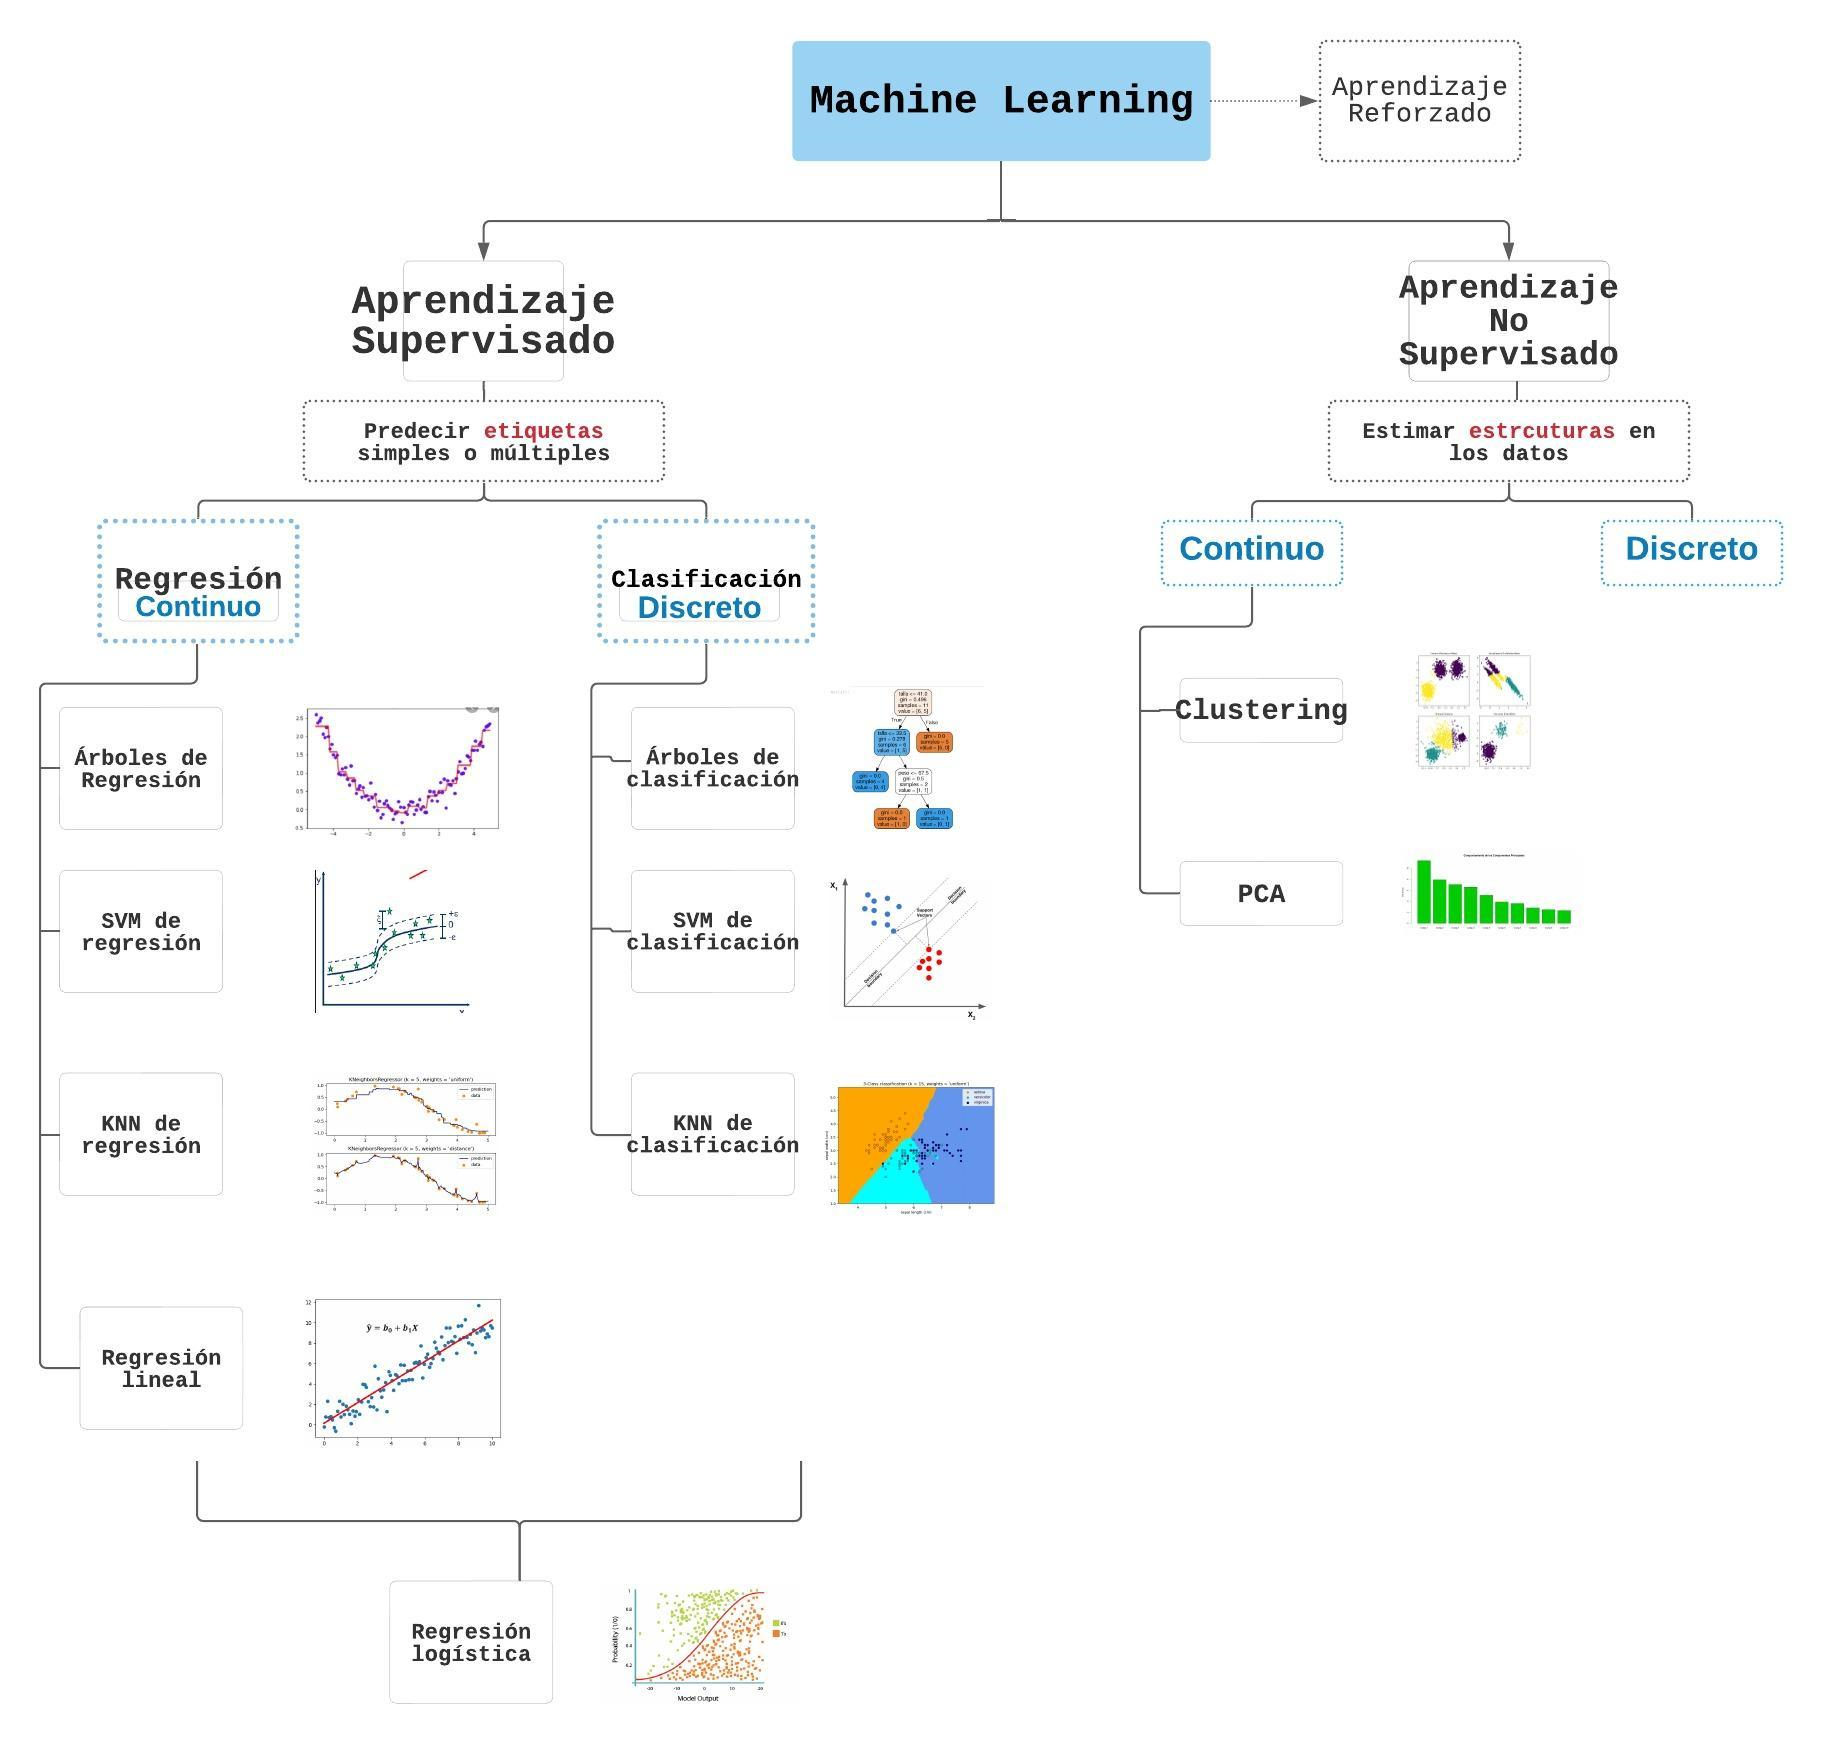

> https://scikit-learn.org/stable/

# Regresión con K-nn

In [ ]:
from sklearn import neighbors
from sklearn.metrics import r2_score 

In [ ]:
# 1. Selección de variables
facebook = pd.read_csv('dataset_Facebook.csv', sep=';')
y = np.array(facebook['Page total likes']).reshape(-1,1)
X = np.array(facebook['Post Month']).reshape(-1,1)

plt.scatter(X,y)


In [ ]:
# 2. Conjunto de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=14)

# 3. Entrenamiento del modelo
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform').fit(X_train,y_train)

# 4. Predicción
T = np.linspace(0,12,125).reshape(-1,1)
# T = T[:len(y_test),:]
predict_ = knn_regressor.predict(T) 

# 5. Evaluación
train_score = knn_regressor.score(X_train,y_train)
test_score = knn_regressor.score(X_test,y_test)

r2 = r2_score(y_test,T)


print("train set score: ",train_score,"\n"
      "test set score: ", test_score,"\n"
      "r2_score: ", r2)

#Plot 
colores = ['darkorange', 'c']

fig = plt.figure()
plt.scatter(X,y, color=colores[0], label = 'data')
plt.plot(T,predict_, color = colores[1],label='Predicción')
plt.legend()
plt.title('Algortimo K-NN para regresión')
plt.show()

***
___

In [ ]:
# 1. Selección de variables
facebook = pd.read_csv('dataset_Facebook.csv', sep=';')
y = np.array(facebook['Lifetime Post Consumers']).reshape(-1,1)
X = np.array(facebook['Lifetime Engaged Users']).reshape(-1,1)

plt.scatter(X,y)

***
___

In [ ]:
# 2. Conjunto de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=14)

# 3. Entrenamiento del modelo
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance').fit(X_train,y_train)

# 4. Predicción
T = np.linspace(0,12000,125).reshape(-1,1)
# T = T[:len(y_test),:]
predict_ = knn_regressor.predict(T) 

# 5. Evaluación
train_score = knn_regressor.score(X_train,y_train)
test_score = knn_regressor.score(X_test,y_test)

r2 = r2_score(y_test,T)


print("train set score: ",train_score,"\n"
      "test set score: ", test_score,"\n"
      "r2_score: ", r2)

#Plot 
colores = ['darkorange', 'c']

fig = plt.figure()
plt.scatter(X,y, color=colores[0], label = 'data')
plt.plot(T,predict_, color = colores[1],label='Predicción')
plt.legend()
plt.title('Algortimo K-NN para regresión')
plt.show()

***
___

# Distinción entre X continua, X discreta o X mixta 

Hay algortimos que son sensibles a la naturaleza de la variable predictora, en algunos casos podemos trabajar con datos mixtos, es decir, con variables predictoras continuas y discrtas, en otras ocasiones debemos evaluar la sensibilidad del algortimo ante el cambio de naturaleza, teniendo en cuenta que si la variable objetivo es continua usaremos algortimos de regresión y si la variable es continua usaremos algoritmos de clasificación para el caso de aprendizaje supervisado 

***
___

<h1><center> ¿Que es aprender? </center></h1>

# ...

***
___

# ¿ Por que usar Machine Learning ? 

1. Resolución de problemas complejos
2. Trabajar con grandes, Enormes Volúmenes de Datos
3. Adaptabilidad 
4. Porque pagan bien

# ¿Cuál es el objetivo de los algoritmos de ML?

Minimizar una función de pérdida
 1. Empirical risk minimization (ERM)

de funciones de pérdida como el error cuadrático medio 

***
___

## <p><span style="color: #ff0000;">Ejercicio</span></p>

Con la base de datos ``iris`` , utilice el algoritmo knn para entrenar un modelo de clasificación, posteriormente evalúe el score obtenido en el conjunto de entrenamiento y conjunto de prueba. Por último realice una predicción con el conjunto de prueba y evalue la exactitud usando la métrica ``accuracy_socore`` de scikit-learn

consejo: utilice los siguientes métodos y/o tributos

    train_test_split()
    KNeighborsClassifier()
    .predict()
    .score()
    accuracy_score()
 
**Nota** 
Escoja solamente dos Variables predictoras
    

In [ ]:
## Data
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.DESCR)

***
___

In [ ]:
y = iris.target.reshape(-1,1)
X = iris.data

In [ ]:
### Respuesta

